In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

from sklearn.preprocessing import StandardScaler

In [13]:
df = pd.read_csv('./b1_player_2022_23.csv')

In [14]:
df.columns

Index(['RANK', 'PLAYER', 'TEAM', 'G', 'GS', 'MIN', 'MINPG', 'PPG', 'FGMPG',
       'FGAPG', 'FG%', '2FGMPG', '2FGAPG', '2FG%', '3FGMPG', '3FGAPG', '3FG%',
       'FTMPG', 'FTAPG', 'FT%', 'ORPG', 'DRPG', 'RPG', 'APG', 'TOPG', 'STPG',
       'BSPG', 'BSRPG', 'FPG', 'FDPG', 'EFFPG', 'PLUSMINUS', 'POSITION'],
      dtype='object')

In [15]:
target_columns = [
    'G',
    'GS',
    'MIN',
    'MINPG',
    'PPG',
    'FGMPG',
    'FGAPG',
    '2FGMPG',
    '2FGAPG',
    '3FGMPG',
    '3FGAPG',
    'FTMPG',
    'FTAPG',
    'ORPG',
    'DRPG',
    'RPG',
    'APG',
    'TOPG',
    'STPG',
    'BSPG',
    'BSRPG',
    'FPG',
    'FDPG',
    'EFFPG',
    'PLUSMINUS'
]

In [9]:
df[target_columns]

,G,GS,MIN,MINPG,PPG,FGMPG,FGAPG,2FGMPG,2FGAPG,3FGMPG,...,RPG,APG,TOPG,STPG,BSPG,BSRPG,FPG,FDPG,EFFPG,PLUSMINUS
0,22,8,629.9,28.6,22.9,7.0,15.6,4.6,8.9,2.5,...,5.7,3.2,3.9,1.8,0.7,0.6,2.4,6.2,23.9,-3.3
1,58,58,2051.2,35.4,22.5,8.1,17.1,6.8,13.5,1.3,...,9.5,7.9,3.1,1.5,0.9,0.6,2.2,5.8,31.6,7.8
2,58,56,1823.5,31.4,20.8,8.0,15.5,6.6,12.1,1.4,...,9.9,4.5,3.2,1.0,0.2,0.3,1.6,3.7,26.8,5.5
3,60,34,1871.3,31.2,20.8,7.5,14.8,6.4,11.1,1.1,...,8.3,3.6,2.0,0.9,0.4,0.4,2.1,4.8,26.1,0.6
4,51,48,1435.0,28.1,20.3,6.9,12.9,5.8,10.2,1.1,...,4.1,4.8,2.9,0.9,0.4,0.5,2.5,6.2,23.9,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,2,0,9.6,4.8,0.0,0.0,0.5,0.0,0.5,0.0,...,1.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,-3.5
350,1,0,0.4,0.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
351,4,0,4.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,-0.5,-1.8
352,3,0,7.2,2.4,0.0,0.0,0.7,0.0,0.3,0.0,...,0.7,0.3,0.0,0.0,0.0,0.0,0.7,0.0,-0.3,2.3


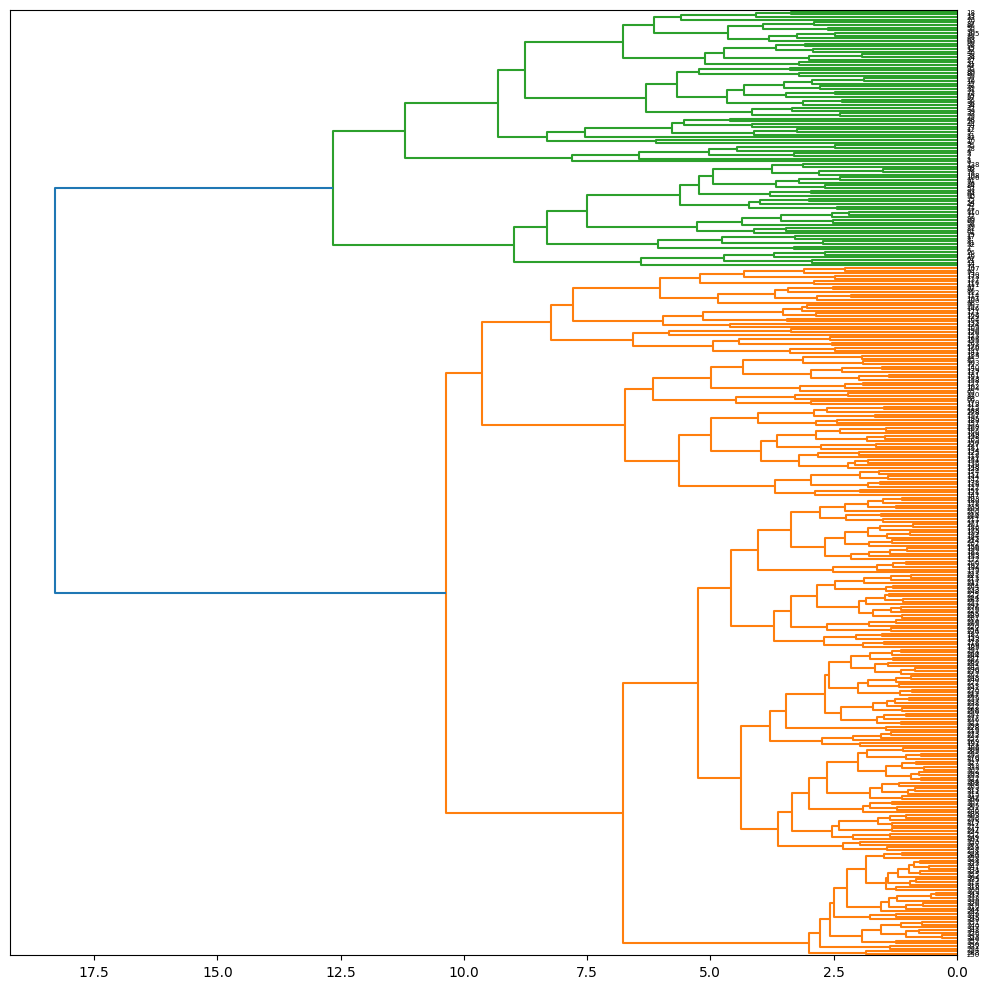

In [31]:
ss = StandardScaler()
X = ss.fit_transform(df[target_columns])

row_clusters = linkage(X, method='complete', metric='euclidean')

fig = plt.figure(figsize=(10,10))
dendrogram(row_clusters, labels=df.index, orientation='left')
plt.tight_layout()
plt.show()